In [1]:
from backend import *
import matplotlib.pyplot as plt

In [82]:
network = 'usa_995'

srlgs, srlg_probs = get_SRLGs(f'PSRLGs/{network}.xml')
srlg_probs = np.asarray(srlg_probs)
srlg_lengths = np.asarray([len(srlg) for srlg in srlgs])

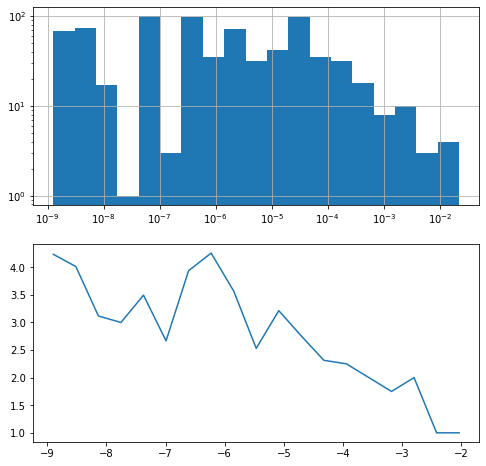

In [87]:
fig, ax = plt.subplots(nrows=2,figsize=(8,8))

# SRLG pdf
bins = range(-9, -1)
ax[0].set_xticks(bins)
ax[0].set_xticklabels([r'$10^{%s}$' % i for i in bins])
counts, bins = np.histogram(np.log10(srlg_probs), bins=19)
ax[0].hist(bins[:-1], bins, weights=counts, log=True)
ax[0].grid()

# SRLG length pdf
lengths = []
for i in range(len(counts)):
    avg_length = np.mean(srlg_lengths[np.argwhere((srlg_probs>np.power(10,bins[i])) & (srlg_probs<np.power(10,bins[i+1])))])
    if not np.isnan(avg_length):
        lengths.append(avg_length)
    else:
        lengths.append(0)

ax[1].plot(bins[:-1], lengths)

In [81]:
for i in range(len(counts)):
    print(f'{np.power(10,bins[i]):.10f} {counts[i]}')

0.0000000201 2
0.0000000353 512
0.0000000618 96
0.0000001082 3108
0.0000001895 513
0.0000003319 352
0.0000005814 384
0.0000010184 528
0.0000017838 3272
0.0000031245 432
0.0000054728 642
0.0000095861 892
0.0000167908 421
0.0000294104 179
0.0000515148 99
0.0000902323 77
0.0001580494 227
0.0002768365 77
0.0004849020 27
0.0008493459 30
0.0014876995 33
0.0026058283 9
0.0045643232 7
0.0079947887 4
0.0140035319 6


In [71]:
for i in range(len(counts)):
    print(f'{np.power(10,bins[i]):.10f} {lengths[i]:.2f}')

0.0000000013 4.24
0.0000000029 4.03
0.0000000067 3.16
0.0000000155 3.00
0.0000000356 3.50
0.0000000818 2.67
0.0000001883 3.33
0.0000004333 4.11
0.0000009972 3.06
0.0000022946 3.43
0.0000052802 2.77
0.0000121503 3.00
0.0000279592 2.68
0.0000643374 1.90
0.0001480478 2.34
0.0003406748 2.13
0.0007839317 1.67
0.0018039165 2.11
0.0041510182 1.00
0.0095519676 1.00
